# Влияние функций активации на классификацию. ДЗ в конце ноутбука

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [2]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

def classification_visualisation(xx, yy, classes):
  classes = classes.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)
  plt.show()


def seed_random(seed=123):
  # The below is necessary for starting Numpy generated random numbers
  # in a well-defined initial state.
  np.random.seed(123)

  # The below is necessary for starting core Python generated random numbers
  # in a well-defined state.
  python_random.seed(123)

  # The below set_seed() will make random number generation
  # in the TensorFlow backend have a well-defined initial state.
  # For further details, see:
  # https://www.tensorflow.org/api_docs/python/tf/random/set_seed
  tf.random.set_seed(1234)

In [3]:
# создание обучающих данных
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                     np.linspace(-2, 2, 100))
train_X = np.c_[x1.ravel(), x2.ravel()]
train_y = train_X[:, 1] > np.sin(train_X [:, 0]*6)

In [4]:
train_X.shape, train_y.shape

((10000, 2), (10000,))

In [5]:
train_X[-1]

array([2., 2.])

In [6]:
train_y[-1]

True

<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


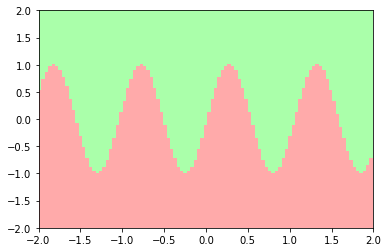

In [7]:
classification_visualisation(x1, x2, train_y)

создаем какую-нибудь модель

In [8]:
def model_experiment(model, seed=123):
  seed_random(seed)
  model.compile(loss='mse', optimizer='Adam')
  model.fit(train_X, train_y, epochs=50, batch_size=512, verbose=0)
  classification_visualisation(x1, x2, model.predict(train_X))

313/313 [==============================] - 0s 839us/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


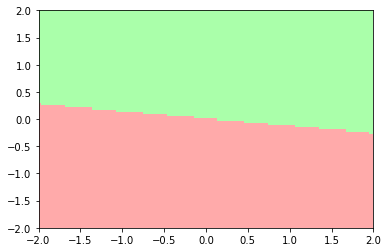

In [9]:
model = Sequential([
  Dense(1, activation='sigmoid', input_shape=(2,))
])

model_experiment(model)

313/313 [==============================] - 0s 952us/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


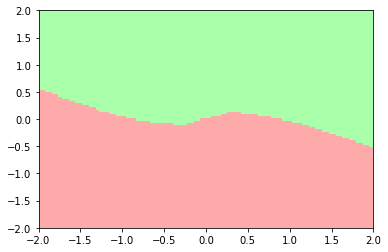

In [10]:
model = Sequential([
  Dense(200, activation='relu', input_shape=(2,)), 
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 0s 942us/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


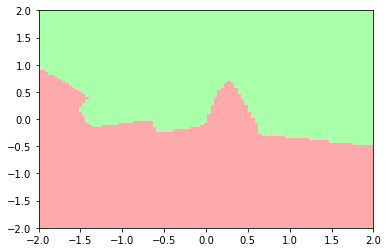

In [11]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 0s 1ms/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


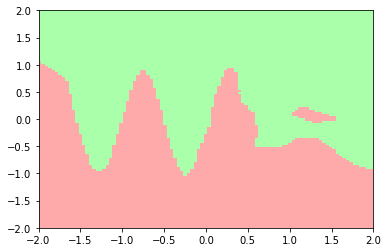

In [12]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


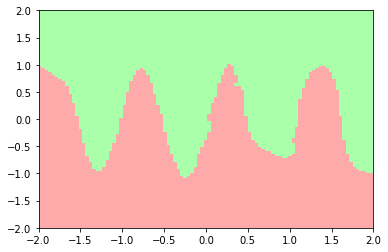

In [13]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 3ms/step


<ipython-input-2-c0329b3d1c7a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)


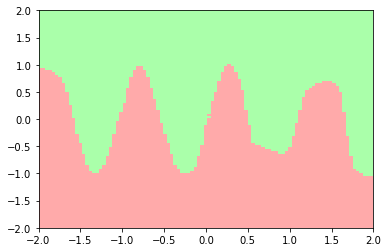

In [14]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

# Смещение распределений во время обучения

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return x  *  (x  >  0)


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

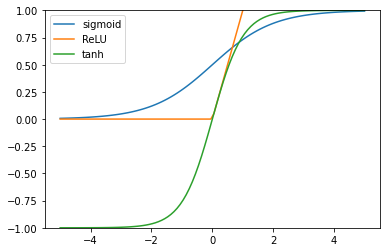

In [17]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.set_ylim(-1, 1)
ax.legend()

In [18]:
dist = np.random.normal(size=100000)

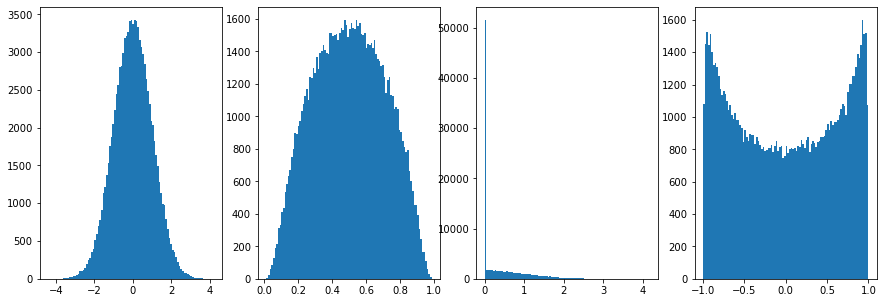

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(sigmoid(dist), bins=100)
_ = axes[2].hist(ReLU(dist), bins=100)
_ = axes[3].hist(tanh(dist), bins=100)

In [20]:
def normalize(dist):
    return 2 * (dist - np.mean(dist))/np.std(dist) + 4

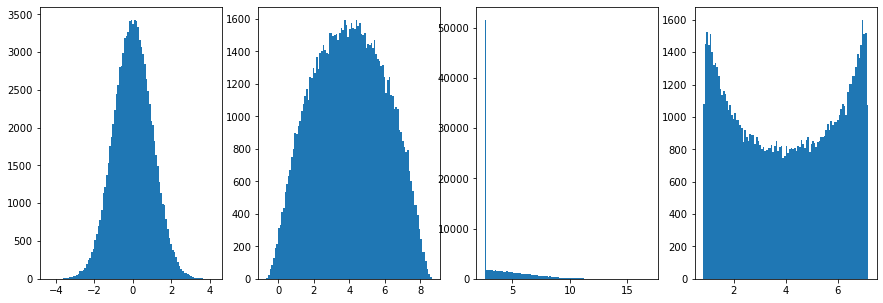

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(normalize(sigmoid(dist)), bins=100)
_ = axes[2].hist(normalize(ReLU(dist)), bins=100)
_ = axes[3].hist(normalize(tanh(dist)), bins=100)

# TensorFlow

In [22]:
# !pip install tensorflow

In [23]:
import tensorflow as tf

print(tf.__version__)
msg = tf.constant('TensorFlow Hello World')
tf.print(msg)

2.9.1
TensorFlow Hello World


In [24]:
tf.test.is_built_with_cuda()

True

In [25]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
msg

<tf.Tensor: shape=(), dtype=string, numpy=b'TensorFlow Hello World'>

In [27]:
# создание тензора

A = tf.constant([[3, 2], 
                 [5, 2]], dtype='int32')

print(A)


tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [28]:
# перевод тензора в объект numpy

A.numpy()

array([[3, 2],
       [5, 2]])

In [29]:
# конкатенация тензоров

B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())


[[3 2 9 5]
 [5 2 1 3]]


In [30]:
# сложение и вычитание тензоров
AB_sum = A + B
AB_dif = A - B

print(AB_sum)
print(AB_dif)

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-6 -3]
 [ 4 -1]], shape=(2, 2), dtype=int32)


In [31]:
# изменение размерности

tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


In [32]:
resh_tensor.numpy()

array([[3, 2, 5, 2, 9, 5, 1, 3]])

In [33]:
# поэлементное перемножение матриц

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.multiply(A, B)
print(AB)

print(A*B)

tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)


In [34]:
# матричное умножение 

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.matmul(A, B)
print(AB)

print(A@B)

tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)


# Fashion mnist

In [35]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.1


## Данные

In [36]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [39]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


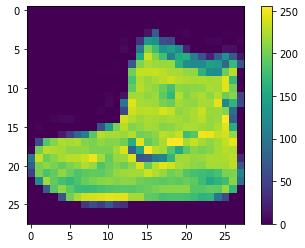

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [41]:
train_images = train_images / 255.0

test_images = test_images / 255.0


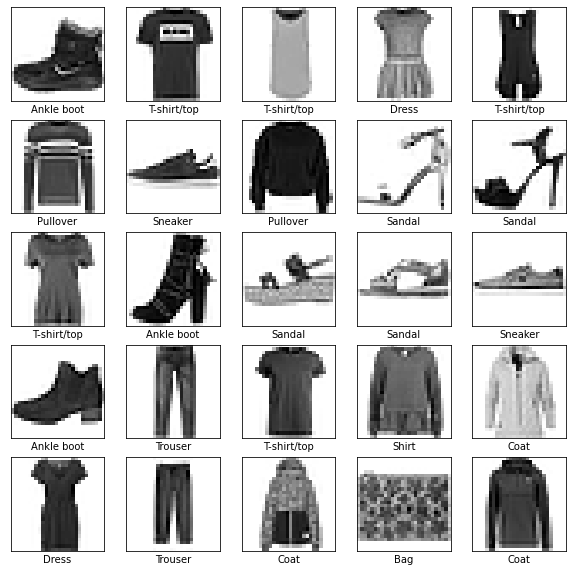

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Обучение

In [43]:
import sys
sys.executable

'C:\\Users\\alexa\\anaconda3\\python.exe'

In [68]:
python -m pip install pip --upgrade

  Using cached pip-22.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [70]:
!pip install graphviz

In [71]:
!pip install pydot

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=100),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10)
])

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                      

In [74]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [75]:
boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 5s - loss: 55.4376 - accuracy: 0.4608 - 5s/epoch - 3ms/step
Epoch 2/3
1875/1875 - 3s - loss: 7.3198 - accuracy: 0.4851 - 3s/epoch - 2ms/step
Epoch 3/3
1875/1875 - 4s - loss: 3.5849 - accuracy: 0.5625 - 4s/epoch - 2ms/step


In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [54]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4984 - accuracy: 0.8272
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8672
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8763


In [55]:
hstr.params

{'verbose': 1, 'epochs': 3, 'steps': 1875}

In [56]:
hstr.history

{'loss': [0.4983964264392853, 0.37350162863731384, 0.3374759256839752],
 'accuracy': [0.8272166848182678, 0.8671500086784363, 0.8763166666030884]}

In [57]:
hstr.model

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [59]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Результаты

In [60]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [61]:
model.predict(test_images)

313/313 [==============================] - 0s 918us/step


array([[ -7.523382  , -12.731433  , -11.16291   , ...,   2.443719  ,
         -2.9720461 ,   4.23602   ],
       [  2.1625092 ,  -7.7887335 ,  11.153614  , ..., -15.381498  ,
         -4.8281302 , -12.727426  ],
       [  0.5726298 ,  13.767625  ,  -3.863893  , ..., -14.318943  ,
         -5.379975  , -13.704314  ],
       ...,
       [  0.92273617,  -7.576243  ,  -1.8295262 , ...,  -6.067994  ,
          7.3948283 ,  -9.848346  ],
       [ -3.1353812 ,  11.054615  ,  -9.38502   , ...,  -7.786672  ,
         -6.1632943 ,  -5.5587945 ],
       [ -5.953933  ,  -8.680516  ,  -6.0632067 , ...,   1.105631  ,
         -1.30825   ,  -3.555693  ]], dtype=float32)

In [62]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [63]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[6.0572561e-06 3.3147305e-08 1.5909218e-07 1.2788404e-07 3.4045820e-06
 9.5279843e-02 2.7535643e-06 1.2910199e-01 5.7397923e-04 7.7503163e-01]
9
9


## Визуализация

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 45ms/step
[[1.2415103e-04 5.9180882e-09 9.9709654e-01 9.9253964e-07 1.1473795e-03
  6.5995831e-10 1.6309163e-03 2.9832191e-12 1.1427574e-07 4.2396878e-11]]


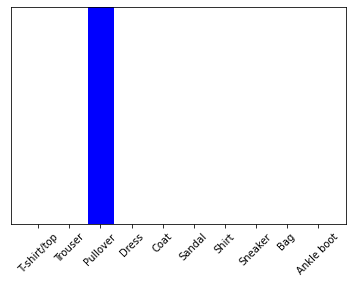

In [65]:
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

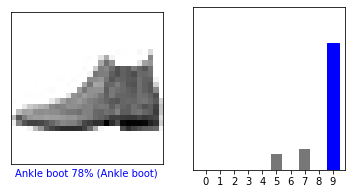

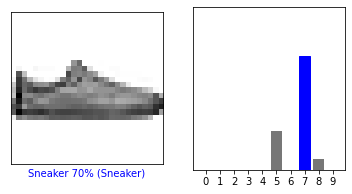

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


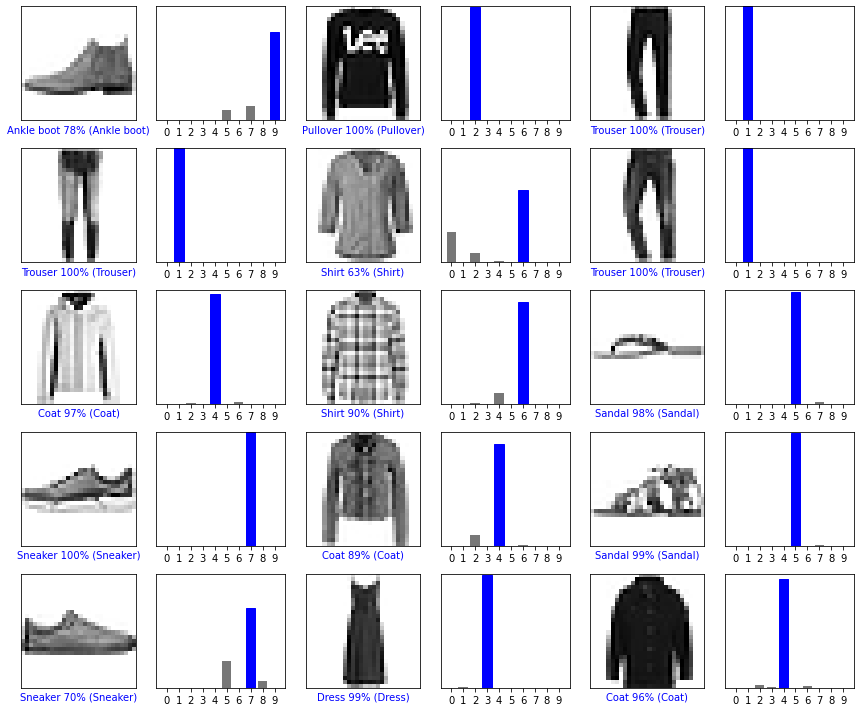

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Домашнее задание

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [77]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [78]:
data = load_wine()

In [79]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [80]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [81]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [84]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [91]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [92]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

In [93]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

In [94]:
np.random.permutation(5)

array([2, 0, 4, 1, 3])

In [95]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.2778)
tensor(0.4074)
tensor(0.5556)
tensor(0.4444)
tensor(0.4630)
tensor(0.5000)
tensor(0.4259)
tensor(0.4815)
tensor(0.5000)
tensor(0.5185)
tensor(0.6111)
tensor(0.6667)
tensor(0.6667)
tensor(0.6481)
tensor(0.6667)
tensor(0.6667)
tensor(0.6852)
tensor(0.7037)
tensor(0.7222)
tensor(0.7222)
tensor(0.7222)
tensor(0.7778)
tensor(0.7778)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)
tensor(0.7778)
tensor(0.7778)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)


C:\Users\alexa\anaconda3\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-96-381b27b71df2>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  plt.scatter(X_train[indexes, 0],


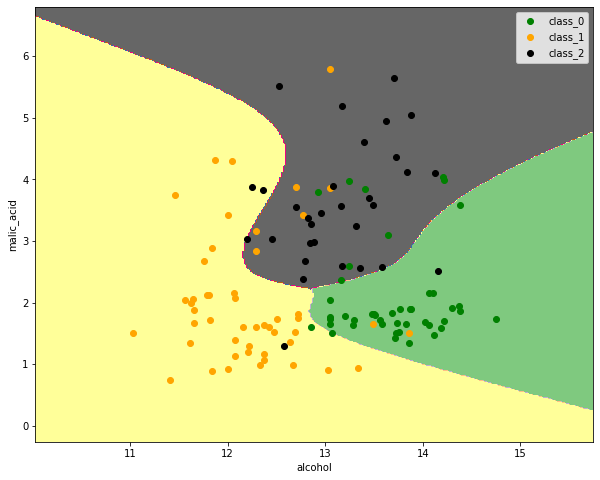

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [104]:
len(classes)

36

In [105]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [106]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [108]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

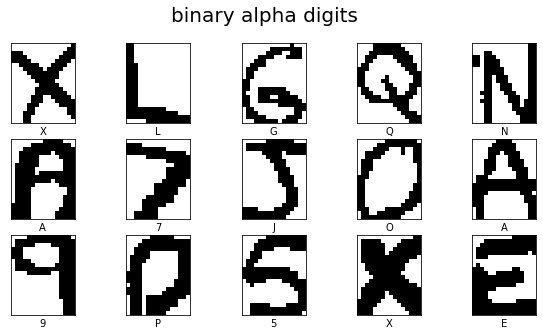

In [110]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1